In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("E-commerce Website Logs.csv", low_memory=False)
data.shape

(172838, 15)

In [3]:
data.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [4]:
data.tail()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
172833,2017-03-16 11:42:01.298,4372,TCP,94.197.121.229,100600,Android App,NaN,Male,US,Normal,English,0.00,Yes,143.36,Debit Card
172834,2017-03-16 12:10:17.340,2167,TCP,129.110.241.72,30400,Android App,NaN,Female,IT,Normal,English,15.15,No,0.00,Cash
172835,2017-03-16 12:10:17.340,2725,TCP,185.119.252.121,100300,Android App,NaN,Female,IT,Normal,English,600.16,No,0.00,Credit Card
172836,2017-03-16 15:52:58.342,3728,TCP,185.145.107.23,50200,Android App,NaN,Male,US,Normal,Russian,75.75,No,0.00,Cash
172837,2017-03-16 15:52:58.342,3420,TCP,202.69.12.251,170800,Android App,NaN,Female,CA,Normal,English,23.46,No,0.00,Credit Card


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [6]:
data.describe()

,duration_(secs),bytes,sales,returned_amount
count,172838.000000,172838.000000,172838.000000,172838.000000
mean,3248.031827,1535.206858,411.346449,74.012092
std,1010.872270,6349.555845,785.537868,364.446435
min,1500.000000,28.000000,0.000000,0.000000
25%,2371.000000,264.000000,5.230000,0.000000
50%,3246.000000,589.000000,46.920000,0.000000
75%,4124.000000,2430.000000,600.160000,0.000000
max,5000.000000,932858.000000,11199.968000,22638.480000


In [7]:
data.isna().sum()

accessed_date           0
duration_(secs)         0
network_protocol        0
ip                      0
bytes                   0
accessed_Ffom           0
age                 73381
gender                  0
country                 0
membership              0
language                0
sales                   0
returned                0
returned_amount         0
pay_method              0
dtype: int64

In [8]:
data.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


Sale percentage Based on payment method


# User Behavior Based on Gender

In [20]:
data.groupby(by="gender", as_index=False).agg({"duration_(secs)": "mean",
                               "sales": "mean",
                               "returned_amount" : "mean"})

,gender,duration_(secs),sales,returned_amount
0,Female,3248.200824,453.544535,82.093670
1,Male,3248.920776,452.142065,80.623961
2,Unknown,3243.504784,0.000000,0.000000


In [31]:
male = data.loc[(data["gender"] == "Male") ]

<Axes: xlabel='duration_(secs)', ylabel='Count'>

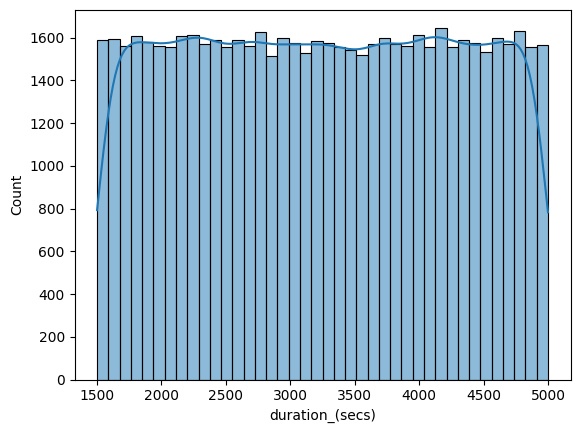

In [33]:
sns.histplot(data=male, x="duration_(secs)", kde=True)

<Axes: xlabel='sales', ylabel='duration_(secs)'>

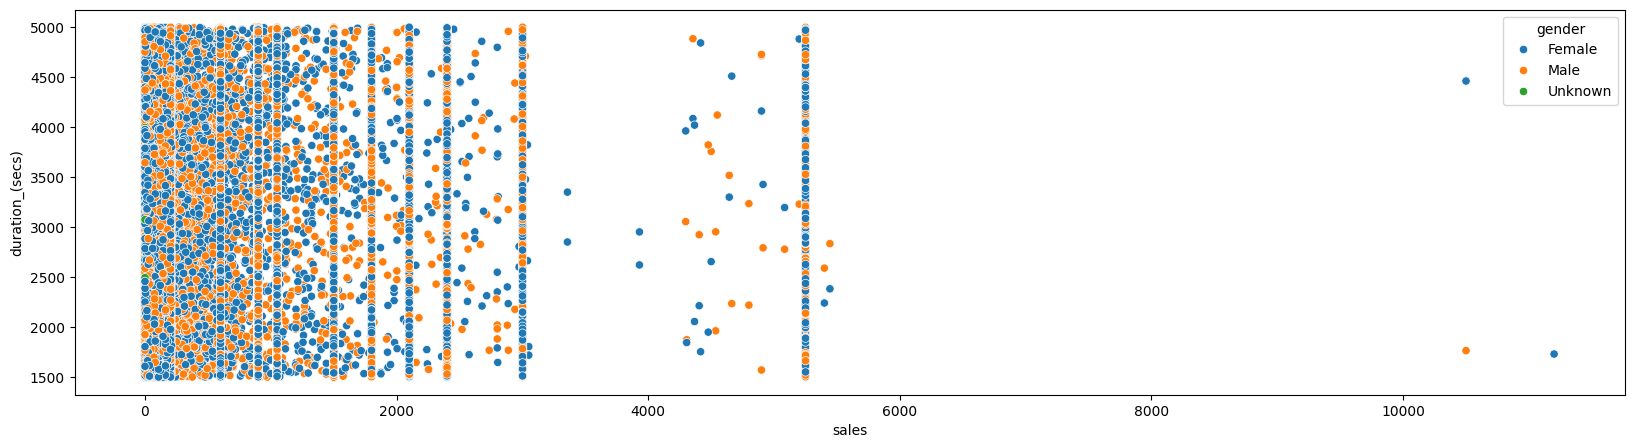

In [53]:
plt.figure(figsize=(20, 5))
sns.scatterplot(data=data,
                x="sales",
                y="duration_(secs)",
                hue="gender",
                )